In [25]:
from nba_api.stats.endpoints import playercareerstats as pcs
from nba_api.stats.static import teams
from nba_api.stats.static import players
import pandas as pd
import json
import time
import requests
from pprint import pprint
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [26]:
# Russel Westbrook
westbrook = 201566
# James Harden
harden = 201935
# Chris Paul
paul = 101108
#season
season = 2018-19

In [27]:
nba_teams = teams.get_teams()
rockets = [team for team in nba_teams if team['abbreviation'] == 'HOU'][0]
rockets_id = rockets['id']
rockets_id

1610612745

In [28]:
RW_career_paul = pcs.PlayerCareerStats(player_id=paul)
RW_career_paul_df = RW_career_paul.get_data_frames()[0]
#RW_career_paul_df.count()
#RW_career_paul_df
#yearthrees = pd.DataFrame({"Years":RW_career_df["SEASON_ID"],
                           #"FG3%":["FG3_PCT"]})
#yearthrees
#RW_career.get_data_frames()[0]
#.to_csv("0.csv")
RW_career_westbrook = pcs.PlayerCareerStats(player_id=westbrook)
RW_career_westbrook_df = RW_career_westbrook.get_data_frames()[0]
#RW_career_westbrook_df.count()
RW_career_westbrook_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201566,2008-09,00,1610612760,OKC,20.0,82,65,2668.0,436,...,0.815,178,221,399,435,110,16,274,191,1256
1,201566,2009-10,00,1610612760,OKC,21.0,82,82,2813.0,485,...,0.780,143,258,401,652,108,34,268,204,1322
2,201566,2010-11,00,1610612760,OKC,22.0,82,82,2847.0,614,...,0.842,121,258,379,670,155,30,316,207,1793
3,201566,2011-12,00,1610612760,OKC,23.0,66,66,2331.0,578,...,0.823,96,205,301,362,112,21,239,147,1558
4,201566,2012-13,00,1610612760,OKC,24.0,82,82,2861.0,673,...,0.800,111,317,428,607,145,24,273,189,1903
5,201566,2013-14,00,1610612760,OKC,25.0,46,46,1412.0,346,...,0.826,55,208,263,319,88,7,177,104,1002
6,201566,2014-15,00,1610612760,OKC,26.0,67,67,2302.0,627,...,0.835,124,364,488,574,140,14,293,184,1886
7,201566,2015-16,00,1610612760,OKC,27.0,80,80,2750.0,656,...,0.812,145,481,626,834,163,20,342,200,1878
8,201566,2016-17,00,1610612760,OKC,28.0,81,81,2802.0,824,...,0.845,137,727,864,840,132,31,438,190,2558
9,201566,2017-18,00,1610612760,OKC,29.0,80,80,2914.0,757,...,0.737,152,652,804,820,147,20,381,200,2028


In [29]:
combined_df = pd.merge(RW_career_paul_df, RW_career_westbrook_df, how="outer", on="SEASON_ID", suffixes = (" PAUL", " WEST"))
combined_df.head()


,PLAYER_ID PAUL,SEASON_ID,LEAGUE_ID PAUL,TEAM_ID PAUL,TEAM_ABBREVIATION PAUL,PLAYER_AGE PAUL,GP PAUL,GS PAUL,MIN PAUL,FGM PAUL,...,FT_PCT WEST,OREB WEST,DREB WEST,REB WEST,AST WEST,STL WEST,BLK WEST,TOV WEST,PF WEST,PTS WEST
0,101108,2005-06,00,1610612740,NOK,21.0,78,78,2808.0,407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101108,2006-07,00,1610612740,NOK,22.0,64,64,2353.0,381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101108,2007-08,00,1610612740,NOH,23.0,80,80,3006.0,630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101108,2008-09,00,1610612740,NOH,24.0,78,78,3002.0,631,...,0.815,178.0,221.0,399.0,435.0,110.0,16.0,274.0,191.0,1256.0
4,101108,2009-10,00,1610612740,NOH,25.0,45,45,1712.0,314,...,0.780,143.0,258.0,401.0,652.0,108.0,34.0,268.0,204.0,1322.0


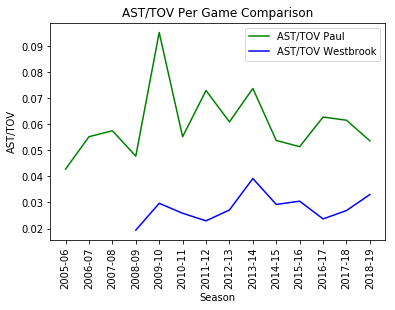

In [70]:
years = combined_df["SEASON_ID"]
GP_Paul = combined_df["GP PAUL"]
GP_West = combined_df["GP WEST"]
combined_df["AST/TOV PAUL"] = (combined_df["AST PAUL"] / combined_df["TOV PAUL"])/combined_df["GP PAUL"]
combined_df["AST/TOV WEST"] = (combined_df["AST WEST"] / combined_df["TOV WEST"])/combined_df["GP WEST"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["AST/TOV PAUL"], color="green", label="AST/TOV Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["AST/TOV WEST"], color="blue", label="AST/TOV Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("AST/TOV Per Game Comparison")
plt.xlabel("Season")
plt.ylabel("AST/TOV")
plt.xticks(years, rotation='vertical')

# Print our chart to the screen
plt.show()

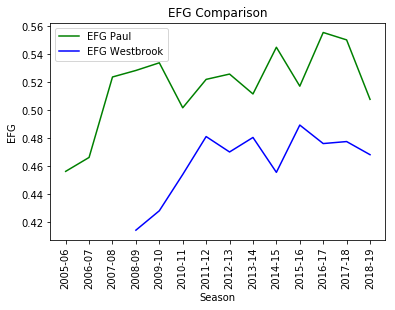

In [61]:
combined_df["EFG PAUL"] = (combined_df["FGM PAUL"] +(0.5*combined_df["FG3M PAUL"] ))/ combined_df["FGA PAUL"]
combined_df["EFG WEST"] = (combined_df["FGM WEST"] +(0.5*combined_df["FG3M WEST"] ))/ combined_df["FGA WEST"]

threshold = .66



# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["EFG PAUL"], color="green", label="EFG Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["EFG WEST"], color="blue", label="EFG Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("EFG Comparison")
plt.xlabel("Season")
plt.ylabel("EFG")
plt.xticks(years, rotation='vertical')

# Print our chart to the screen
plt.show()

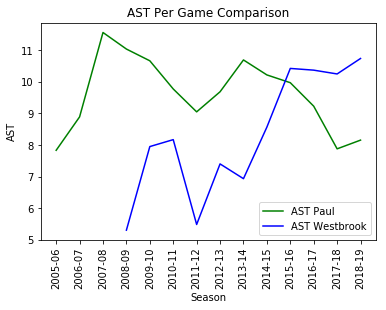

In [60]:
years = combined_df["SEASON_ID"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["AST PAUL"]/combined_df["GP PAUL"], color="green", label="AST Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["AST WEST"]/combined_df["GP WEST"], color="blue", label="AST Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("AST Per Game Comparison")
plt.xlabel("Season")
plt.ylabel("AST")
plt.xticks(years, rotation='vertical')


# Print our chart to the screen
plt.show()

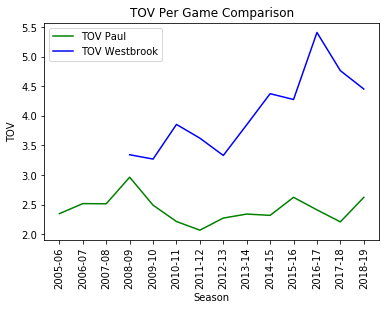

In [59]:
years = combined_df["SEASON_ID"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["TOV PAUL"]/combined_df["GP PAUL"], color="green", label="TOV Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["TOV WEST"]/combined_df["GP WEST"], color="blue", label="TOV Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("TOV Per Game Comparison")
plt.xlabel("Season")
plt.ylabel("TOV")
plt.xticks(years, rotation='vertical')

# Print our chart to the screen
plt.show()

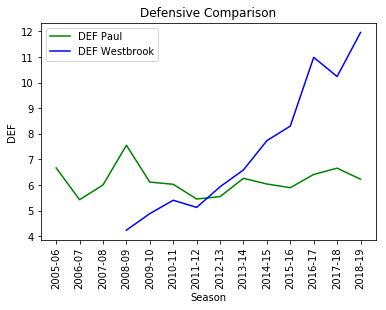

In [58]:
combined_df["DEF PAUL"] = (combined_df["DREB PAUL"] + combined_df["STL PAUL"] + combined_df["BLK PAUL"]) / combined_df["GP PAUL"] 
combined_df["DEF WEST"] = (combined_df["DREB WEST"] + combined_df["STL WEST"] + combined_df["BLK WEST"]) / combined_df["GP WEST"]
# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["DEF PAUL"], color="green", label="DEF Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["DEF WEST"], color="blue", label="DEF Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Defensive Comparison")
plt.xlabel("Season")
plt.ylabel("DEF")
plt.xticks(years, rotation='vertical')

# Print our chart to the screen
plt.show()

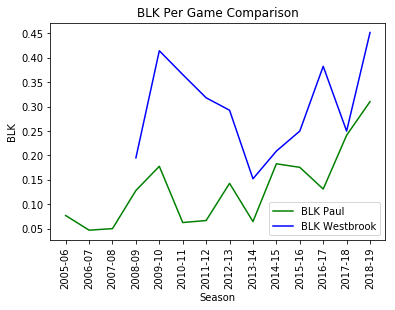

In [57]:
years = combined_df["SEASON_ID"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["BLK PAUL"]/combined_df["GP PAUL"], color="green", label="BLK Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["BLK WEST"]/combined_df["GP WEST"], color="blue", label="BLK Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("BLK Per Game Comparison")
plt.xlabel("Season")
plt.ylabel("BLK")
plt.xticks(years, rotation='vertical')


# Print our chart to the screen
plt.show()

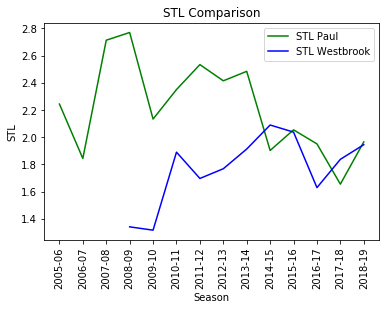

In [56]:
years = combined_df["SEASON_ID"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["STL PAUL"]/combined_df["GP PAUL"], color="green", label="STL Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["STL WEST"]/combined_df["GP WEST"], color="blue", label="STL Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("STL Comparison")
plt.xlabel("Season")
plt.ylabel("STL")
plt.xticks(years, rotation='vertical')


# Print our chart to the screen
plt.show()

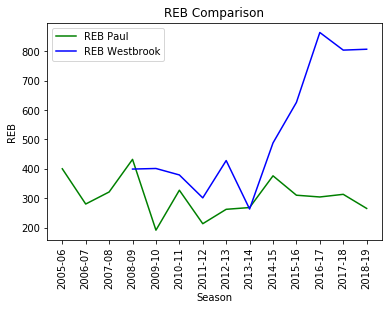

In [55]:
years = combined_df["SEASON_ID"]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["REB PAUL"], color="green", label="REB Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["REB WEST"], color="blue", label="REB Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("REB Comparison")
plt.xlabel("Season")
plt.ylabel("REB")
plt.xticks(years, rotation='vertical')


# Print our chart to the screen
plt.show()

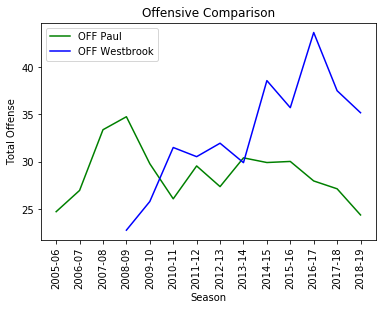

In [76]:
combined_df["DEF PAUL"] = (combined_df["PTS PAUL"] + combined_df["AST PAUL"] + combined_df["OREB PAUL"])  / combined_df["GP PAUL"] 
combined_df["DEF WEST"] = (combined_df["PTS WEST"] + combined_df["AST WEST"] + combined_df["OREB WEST"]) / combined_df["GP WEST"]
# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["DEF PAUL"], color="green", label="OFF Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["DEF WEST"], color="blue", label="OFF Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Offensive Comparison")
plt.xlabel("Season")
plt.xticks(years, rotation='vertical')

plt.ylabel("Total Offense")

# Print our chart to the screen
plt.show()

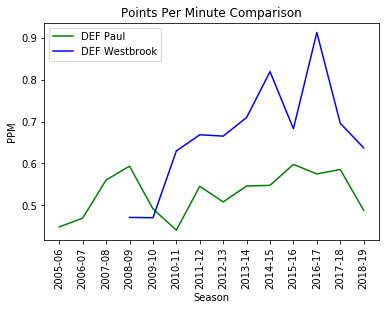

In [72]:
combined_df["DEF PAUL"] = combined_df["PTS PAUL"]  / combined_df["MIN PAUL"] 
combined_df["DEF WEST"] = combined_df["PTS WEST"]  / combined_df["MIN WEST"]
# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, combined_df["DEF PAUL"], color="green", label="DEF Paul")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, combined_df["DEF WEST"], color="blue", label="DEF Westbrook")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Points Per Minute Comparison")
plt.xlabel("Season")
plt.xticks(years, rotation='vertical')
plt.ylabel("PPM")

# Print our chart to the screen
plt.show()

In [21]:
#nba_players = players.get_players()
#player_df = json_normalize(nba_players)
#active_players_df = player_df[player_df.is_active == True].reset_index()
#active_players_df

In [63]:
#averages = []
#for x in active_players_df["id"]:
#    career = pcs.PlayerCareerStats(player_id = x,timeout = 100)
 #   career_3pct = career.get_data_frames()[1]["FG3_PCT"]
  #  averages.append(career_3pct)

SyntaxError: invalid syntax (<ipython-input-17-195dd621e990>, line 2)

NameError: name 'active_players_df' is not defined

NameError: name 'averages' is not defined